In [1]:
%matplotlib inline
from common import *

In [2]:
ds_obj = data.real_multiday_1d

# Check LOSS

In [36]:
iter_range, share_pack_loss, shares_cdf_loss = am.analyze.shares_pack_learn_loss(ds_obj)
# shares_cdf_loss = shares_cdf_learn_loss(ds_2d)

12 samples
12 samples
12 samples
12 samples
[ERROR] (0, 0) shares-hist unsupported operand type(s) for -: 'NoneType' and 'NoneType' zip argument #1 must support iteration
[ERROR] (1, 0) reserved-hist unsupported operand type(s) for -: 'list' and 'list' operands could not be broadcast together with shapes (4,9) (128,9) 
[ERROR] (1, 0) shares-hist unsupported operand type(s) for -: 'list' and 'NoneType' zip argument #2 must support iteration


In [31]:
iter_range, shares_mse, shares_mean_err, shares_max_err = analyze.shares_loss(ds_obj_q, iter_count=5,
                                                                                 sub_name='shares-limit-0.5')

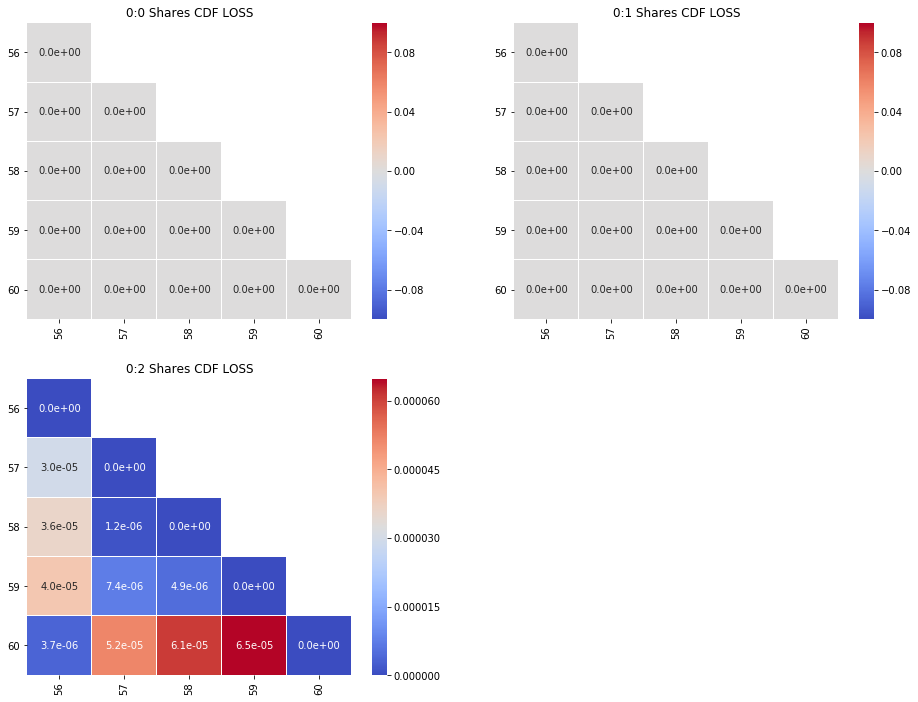

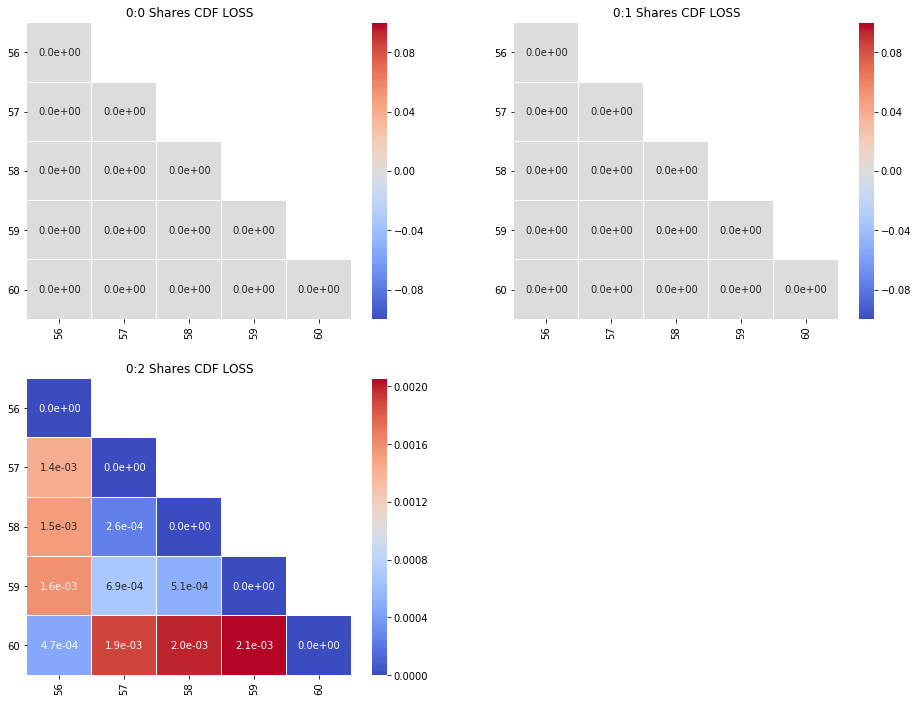

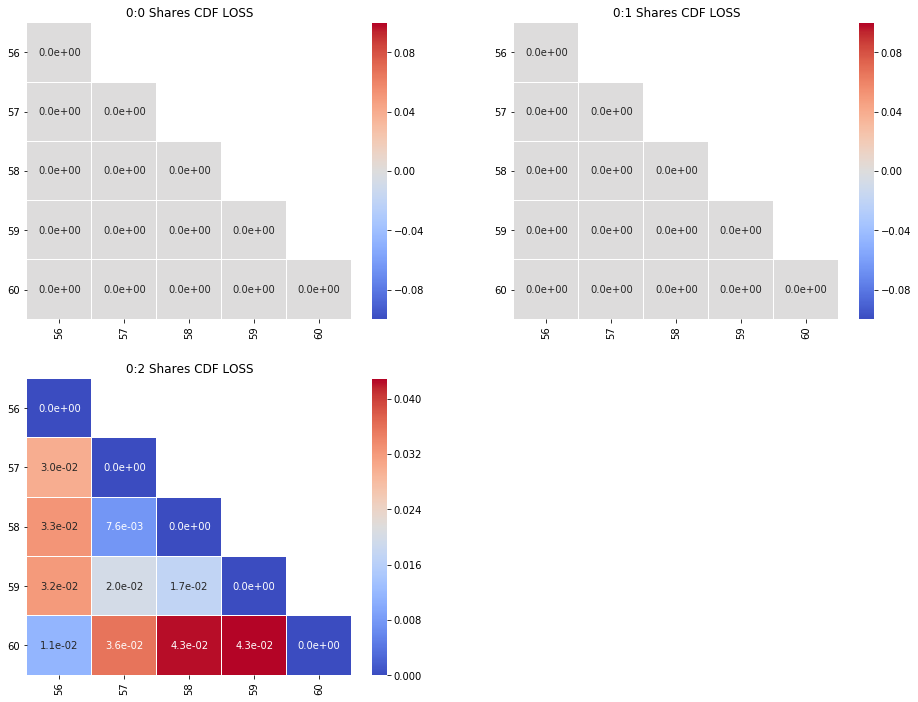

In [32]:
plot.plot_shares_loss(iter_range, shares_mse)
plot.plot_shares_loss(iter_range, shares_mean_err)
plot.plot_shares_loss(iter_range, shares_max_err)

# Test functions

In [337]:
sd = ds_obj.load_data(0)
#sd.meta

Data already generated.


In [347]:
shares_alloc_cdf = [s[0] for s in shares_cdf]
print([s.shape for s in shares_alloc_cdf])
print([[s[0]] for s in shares_alloc_cdf])

[(9, 5116)]
[[array([0.00000000e+00, 1.96848805e-04, 3.93697611e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])]]


In [351]:
reserved_allocs = am.param.get_reserved_allocs(ds_obj, 9)
print(reserved_allocs)
_, shares_cdf = am.analyze.get_share_via_histogram(ds_obj, 'reserved', result_type='unlimited',
                                                   reserved_as_shares=True)
shares_alloc_cdf = [s[0] for s in shares_cdf]
v = sd.calc_valuation_for_bundles_and_alloc_cdf(reserved_allocs, shares_alloc_cdf, matching_shares=True)
v1 = sd.calc_valuation_for_reserved(reserved_allocs)
v.shape

[array([ 0.125,  0.25 ,  0.5  ,  1.   ,  2.   ,  4.   ,  8.   , 16.   ,
       32.   ])]
12 samples
12 samples
Bundle index: (8,) - active: 887             

(1024, 9)

In [378]:
reserved_allocs = am.param.get_reserved_allocs(ds_obj, 9)
fake_reserved_allocs = [[0] for _ in range(1)]
bundles = (*fake_reserved_allocs, *reserved_allocs)
len(bundles), bundles

(2,
 ([0], array([ 0.125,  0.25 ,  0.5  ,  1.   ,  2.   ,  4.   ,  8.   , 16.   ,
         32.   ])))

In [362]:
sub_name = 'burst-via-shares'
args, kwargs = am.sim_start.start_select_bundle_burst_via_shares_simulation(ds_obj, 1, sub_name,
                                                                            run_simulation=False)
am.workers.select_bundle_shares_worker(ds_obj, 1, sd, *args, **kwargs)

12 samples
12 samples
12 samples
12 samples
Bundle index: (8,) - active: 887             

{'bundle': {'active': array([[ True,  True,  True, ...,  True,  True,  True]]),
  'ind': array([[[0],
          [3],
          [4],
          ...,
          [3],
          [3],
          [3]]]),
  'iter': array([[1, 0, 0, ..., 0, 0, 0]], dtype=uint32),
  'limit': array([[[64],
          [ 0],
          [ 1],
          ...,
          [ 0],
          [ 0],
          [ 0]]]),
  'price': array([[0.125, 1.   , 2.   , ..., 1.   , 1.   , 1.   ]]),
  'profit': array([[4.96026073, 2.04745213, 2.35325449, ..., 1.21499143, 3.42472896,
          1.11969937]]),
  'select': array([[[0.125],
          [1.   ],
          [2.   ],
          ...,
          [1.   ],
          [1.   ],
          [1.   ]]]),
  'val': array([[5.08526073, 3.04745213, 4.35325449, ..., 2.21499143, 4.42472896,
          2.11969937]])},
 'bundle-stats': {'active-player-count': array([1024]),
  'active-servers': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1

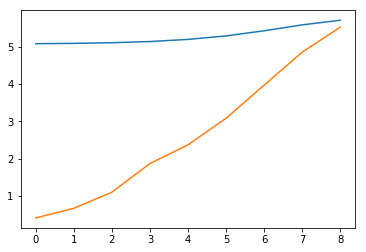

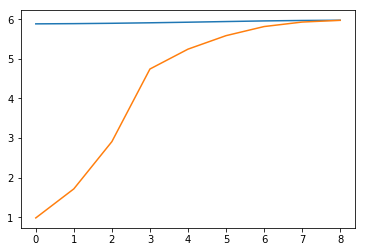

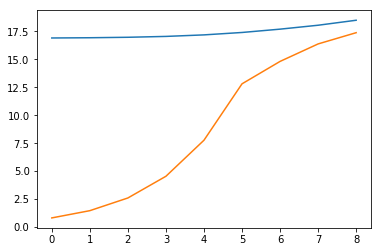

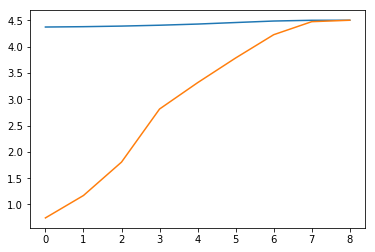

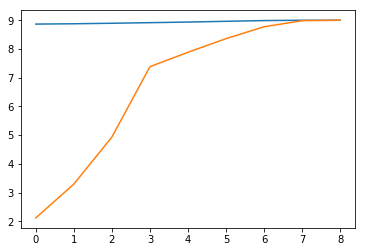

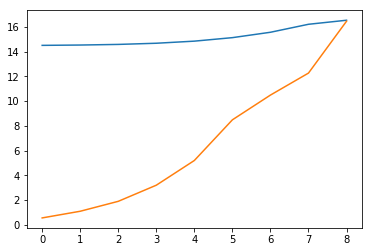

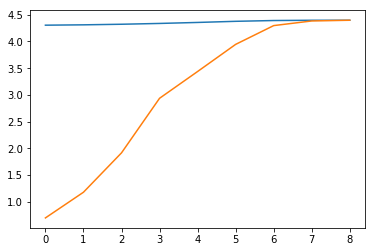

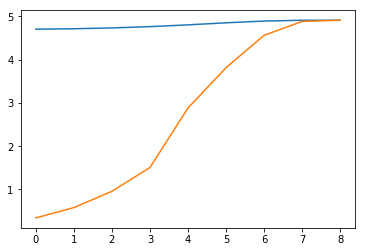

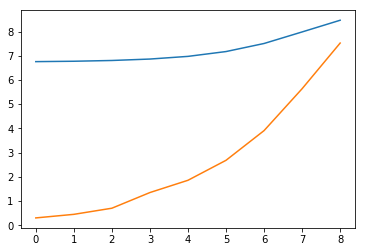

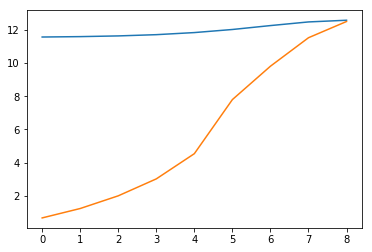

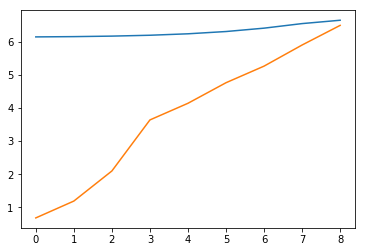

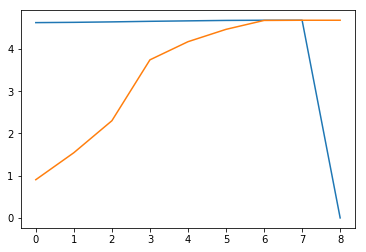

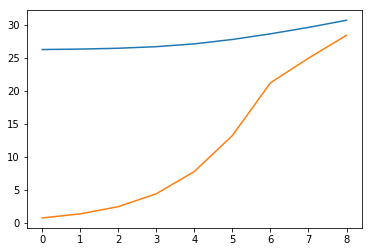

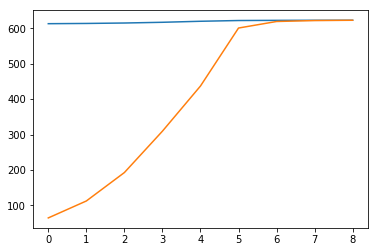

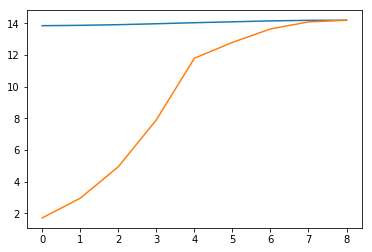

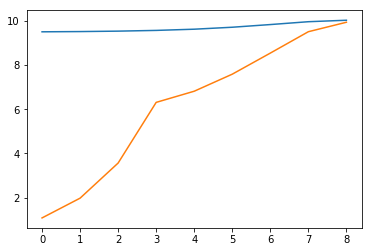

In [353]:
for vv, vv1 in zip(v[:16], v1[:16]):
    plt.plot(vv)
    plt.plot(vv1)
    plt.show()

In [619]:
reserved_total_resources = np.array([64])
sel_res = ds_obj.read_result_file('select-alloc-learn-150', 0)
selected = sel_res['bundle']['select'][0]
selected.shape

(1024, 2)

In [581]:
reserved_total_resources = np.array([64])
sel_res_reserved = ds_obj.read_result_file('select-alloc-reserved-only', 0)
up_ind = np.abs(sel_res_reserved['input']['server-price'] - 64).argmin()
selected_reserved = sel_res_reserved['bundle']['select'][up_ind]
selected_reserved.shape

(1024, 1)

40 27.379883 [26.11914  26.076172  4.399414  0.      ] 26.143604


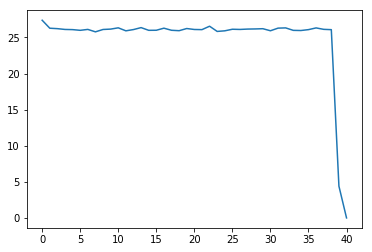

In [663]:
alloc_count, _ = am.lib.pack_players_to_servers(reserved_total_resources, selected_reserved, niter=1024, max_servers=64)
axis=-1
end = np.sum(alloc_count > 1, axis=axis)
print(end, alloc_count[0], alloc_count[end-3:end+1], am.analyze.get_mean_alloc_count(alloc_count))
plt.plot(alloc_count[:end+1])

In [667]:
print((1024/26.143604) / (1024/39.321213) - 1, 40/27 - 1, 39/26 - 1)
print(1 - (1024/39.321213) / (1024/26.143604), 1 - 27/40, 1 - 26/39)

0.5040471466749572 0.4814814814814814 0.5
0.33512722509348836 0.32499999999999996 0.33333333333333337


27 48.13672 [20.016602   18.458008    1.5732422   0.07421875] 39.321213


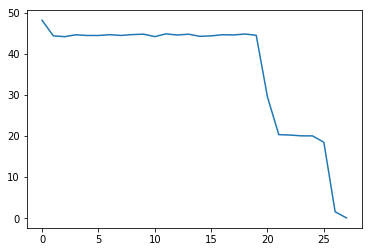

In [661]:
alloc_count, _ = am.lib.pack_players_to_servers(reserved_total_resources, selected, niter=1024, max_servers=64)
axis=-1
end = np.sum(alloc_count > 1, axis=axis)
print(end, alloc_count[0], alloc_count[end-3:end+1], am.analyze.get_mean_alloc_count(alloc_count))
plt.plot(alloc_count[:end+1])

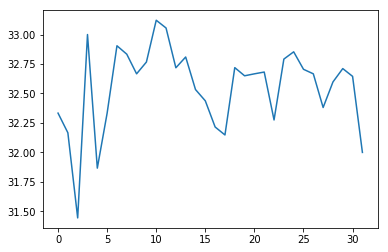

In [541]:
max_avg_alloc_count = np.cumsum(alloc_count, axis=axis) / np.arange(1, alloc_count.shape[-1] + 1)
plt.plot(max_avg_alloc_count[:end])

In [546]:
np.diff(max_avg_alloc_count)

array([-0.16666794, -0.72222137,  1.55555725, -1.13333435,  0.46666768,
        0.57142784, -0.07142912, -0.1666654 ,  0.09999898,  0.35454462,
       -0.06565556, -0.33760755,  0.0915752 , -0.27619106, -0.0958313 ,
       -0.22181253, -0.06753819,  0.57115004, -0.06929932,  0.01666667,
        0.01515152, -0.40645675,  0.51630523,  0.06166585, -0.1482051 ,
       -0.03846076, -0.28571356,  0.21674944,  0.11340991, -0.06594921,
       -0.64516326, -0.96969697, -0.91265597, -0.8605042 , -0.81269841,
       -0.76876877, -0.72830725, -0.69095816, -0.65641026, -0.62439024,
       -0.59465738, -0.56699889, -0.54122622, -0.51717172, -0.49468599,
       -0.47363552, -0.45390071, -0.43537415, -0.41795918, -0.40156863,
       -0.38612368, -0.37155298, -0.35779175, -0.34478114, -0.33246753,
       -0.32080201, -0.30973987, -0.29924021, -0.28926554, -0.27978142,
       -0.27075621, -0.26216078, -0.25396825])

In [93]:
unified_result = analyze.read_unify_pack_results(ds_2d, learn_iter=34)
# shares_cdf = analyze.get_share_via_histogram(ds_2d, only_reserved=True, unified_result=unified_result)
# unit_prices = unified_result['unit-prices']

# up_ind = [0, 5, 10, 15]
# up_ind_mesh = np.meshgrid(up_ind, up_ind, sparse=False, indexing='ij')
# unit_prices = [up[up_ind] for up in unit_prices]
# shares_cdf = [s[up_ind_mesh] for s in shares_cdf]

# reserved_allocs = unified_result['reserved-allocs']
# shares_portions = unified_result['shares-portions']
# fixed_revenues = unified_result['host-revenue']#[up_ind_mesh]
#unit_prices_order = [(0,0), (1,1), (2,2), (3, 3)]

12 samples
12 samples


In [4]:
fixed_unified_result = analyze.read_unify_pack_results(ds_2d, learn_iter=0)
up_ind = [0, 5, 10, 15, 20]
up_ind_mesh = np.meshgrid(up_ind, up_ind, sparse=False, indexing='ij')
fixed_allocated = fixed_unified_result['allocated-count'][up_ind_mesh]
fixed_host_revenue = fixed_unified_result['host-revenue'][up_ind_mesh]
fixed_active_count = fixed_unified_result['active-player-count'][up_ind_mesh]
del fixed_unified_result

unified_result = analyze.read_unify_pack_results(ds_2d, learn_iter=34)
unit_prices = unified_result['unit-prices']
del unified_result

12 samples
12 samples
12 samples
12 samples


In [55]:
#shares_portions = workers.get_shares_portions_per_resource(ds_2d)
args, kwargs, unified_result = am.sim_start.start_select_alloc_shares_learn_simulation(ds_obj, 1,
                             only_reserved=False,
                             use_previous_shares_unit_price=False,
                             prev_iter_counts=1,
                             run_simulation=False)
#kwargs['cdf_for_each_unit_price'] = False
#host_revenue_low_bar = kwargs['host_revenue_low_bar']
#kwargs['host_revenue_low_bar'] = host_revenue_low_bar * 0.95
# server_price, reserved_allocs, shares_portions, shares_limit, shares_cdf = args

12 samples
12 samples


In [82]:
am.workers.select_alloc_worker(ds_obj, 0, sd, *args, **kwargs)

Bundle index: (8,) - active: 0                 

{'bundle': {'active': array([[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True, False, ...,  True, False,  True]]),
  'ind': array([[[ 2,  0],
          [ 3,  0],
          [ 5,  0],
          ...,
          [ 3,  0],
          [ 4,  0],
          [ 3,  0]],
  
         [[ 2,  0],
          [ 3,  0],
          [ 5,  0],
          ...,
          [ 3,  0],
          [ 0,  0],
          [ 3,  0]],
  
         [[ 2,  0],
          [ 0,  0],
          [-1,  0],
          ...,
          [ 0,  0],
          [-1, -1],
          [ 1,  0]]]),
  'limit': array([[[ 0.5  ],
          [ 1.   ],
          [ 4.   ],
          ...,
          [ 1.   ],
          [ 2.   ],
          [ 1.   ]],
  
         [[ 0.5  ],
          [ 1.   ],
          [ 4.   ],
          ...,
          [ 1.   ],
          [ 0.125],
          [ 1.   ]],
  
         [[ 0.5  ],
          [ 0.125],
          [-1.   ],
          ...,
          [ 0.125],

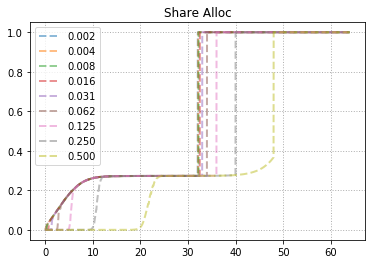

In [83]:
analyze.plot_share_via_histogram(ds_2d, (1,1), 0, learn_iter=34, unified_result=unified_result,
                                 shares_cdf_all_up=shares_cdf, plot_only_reserved=False)

In [15]:
# import cProfile, pstats, io
# pr = cProfile.Profile()
# pr.enable()
valuation = sd.calc_valuation_for_bundles_and_alloc_cdf(reserved_allocs, [s[0] for s in shares_cdf])
# pr.disable()

Bundle index: (8,) - active: 0               

In [80]:
ps = pstats.Stats(pr).sort_stats('cumulative').print_stats()

         32566092 function calls in 112.840 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  112.840   56.420 /home/fonaro/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2880(run_code)
        2    0.000    0.000  112.840   56.420 {built-in method builtins.exec}
        1    0.000    0.000  112.840  112.840 <ipython-input-79-2f06e1c6e4d7>:5(<module>)
        1    0.021    0.021  112.840  112.840 /home/fonaro/workspace/wRaaS/cloud-simulations/cloudsim/sim_data.py:1216(calc_valuation_for_bundles_and_alloc_cdf)
       81    0.040    0.000  112.666    1.391 /home/fonaro/workspace/wRaaS/cloud-simulations/cloudsim/sim_data.py:1190(calc_valuation_for_alloc_cdf_list)
    13344    0.096    0.000  112.344    0.008 /home/fonaro/workspace/wRaaS/cloud-simulations/cloudsim/sim_data.py:1204(<genexpr>)
    13263   29.997    0.002  112.248    0.008 /home/fonaro/workspace/wRaaS/cloud-simu

In [190]:
valuation3 = sim_data.calc_valuation_for_bundles_and_alloc_cdf(sd_2d_0, args[1], [s[1,1] for s in args[-1]])

Bundle index: (8, 8) - active: 1              

In [101]:
s = io.StringIO()
sortby = 'tottime'
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         162318193 function calls in 428.730 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2148606   75.458    0.000  214.033    0.000 /home/fonaro/workspace/wRaaS/vecfunc/vecfunc/vecfunclib.py:108(expected_value)
  4311499   51.012    0.000   51.012    0.000 {built-in method numpy.core.multiarray.interp}
  4297212   34.642    0.000   72.978    0.000 /home/fonaro/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:621(require)
 10864015   31.999    0.000   31.999    0.000 {built-in method numpy.core.multiarray.array}
  2148606   26.644    0.000   28.333    0.000 /home/fonaro/anaconda3/lib/python3.6/site-packages/numpy/ctypeslib.py:438(as_ctypes)
  2148606   26.028    0.000   26.028    0.000 /home/fonaro/workspace/wRaaS/cloud-simulations/cloudsim/stats.py:111(cdf_minimum)
  2148606   22.625    0.000   27.299    0.000 /home/fonaro/anaconda3/lib/python3.6/site-packages/numpy/ctypeslib.py:196(from_param)
    26526  

In [19]:
valuation.nbytes / 2**20

31.640625

In [20]:
sim_data.write_data(valuation, '/home/fonaro/testval.msgpack')

In [11]:
valuation = sim_data.read_data('/home/fonaro/testval.msgpack')

BadZipFile: File is not a zip file

In [78]:
valuation1 = sim_data.calc_valuation_for_bundles_and_alloc_cdf(sd_2d_1, reserved_allocs, [s[1,1] for s in shares_cdf])

Bundle index: (8, 8) - active: 0              

In [13]:
reserved_only_unified_result = am.analyze.read_unify_pack_results(ds_obj, learn_iter=0)

12 samples
12 samples


# Analyze

Reading parameter: 60 instead of None
| Key                        |       Value |   Reserved Value |    Factor |
|:---------------------------|------------:|-----------------:|----------:|
| active-player-count        | 1024        |      1024        |  1        |
| allocated-count            |   69.8643   |        24.9822   |  2.79657  |
| active-servers             |   15.4167   |        41.5833   |  0.370741 |
| always-active-servers      |   14        |        40        |  0.35     |
| host-revenue               | 1714.89     |      2636.42     |  0.650461 |
| resources-allocated-0      |    0.999999 |         0.999968 |  1.00003  |
| resources-allocated-1      |   17.328    |         1        | 17.328    |
| effective-value-mean-ratio |    1.35651  |         0.966494 |  1.40354  |
Reading parameter: 60 instead of None


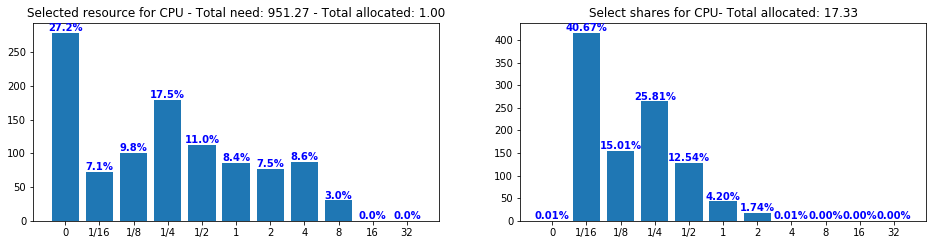

Reading parameter: 60 instead of None
Mean utilization: 0.869657 - Max utilization: 1.00391
Reserved Mean utilization: 0.150048 - Max utilization: 0.539809


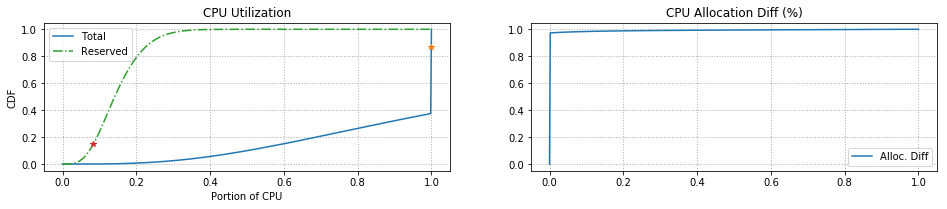

Reading parameter: 60 instead of None


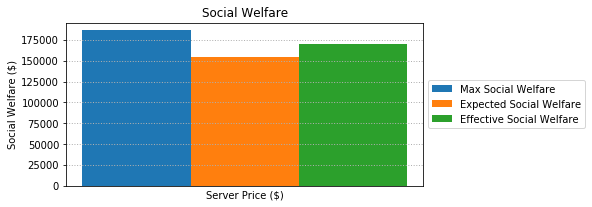

Reading parameter: 60 instead of None
Reading parameter: 60 instead of None
Reading parameter: 60 instead of None


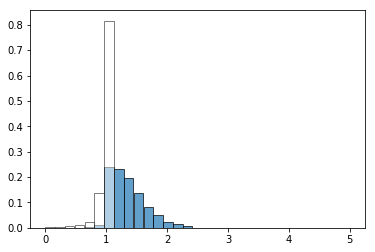

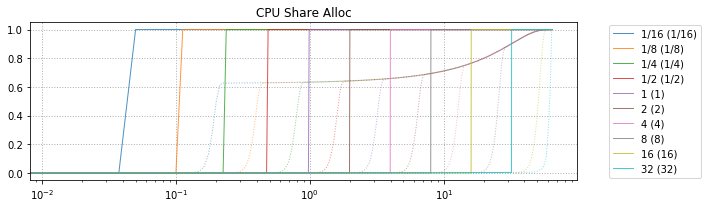

In [24]:
am.plot.plot_mean_unified_results(ds_obj.q, 'shares', None, 'shares-unlimit-3-max-test',
                                  compare_with_reserved=True)

Reading parameter: 96 instead of None
12 samples
12 samples


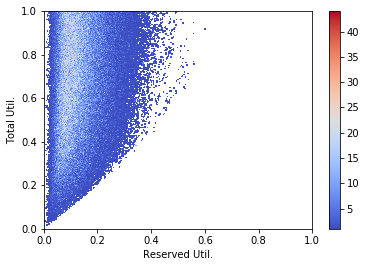

In [246]:
am.plot.plot_alloc_histogram(ds_obj.q, 'burst', None, 'burst-via-shares')

Reading parameter: 81 instead of None
Reading parameter: 81 instead of None


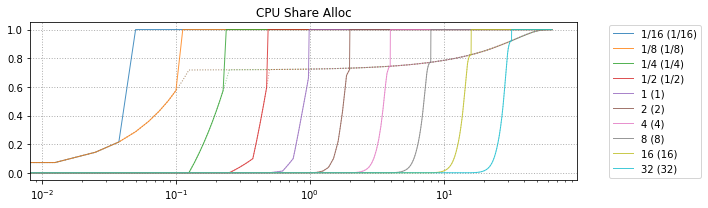

In [197]:
am.plot.plot_share(ds_obj.q, 'burst', None, 'burst-via-shares', method='util', total_shares=[64], log_scale=True)

Reading parameter: 84 instead of None
Reading parameter: 84 instead of None


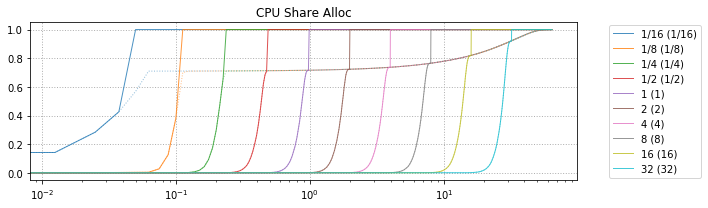

In [202]:
am.plot.plot_share(ds_obj.q, 'burst', None, 'burst-via-shares', method='hist', total_shares=[64], log_scale=True)

Reading parameter: 16 instead of None
| Key                        |       Value |   Reserved Value |    Factor |
|:---------------------------|------------:|-----------------:|----------:|
| active-player-count        | 1024        |       1024       |  1        |
| allocated-count            |  100.948    |         42.4189  |  2.37978  |
| active-servers             |   10.9167   |         25       |  0.436667 |
| always-active-servers      |   10        |         24       |  0.416667 |
| host-revenue               |  927.453    |       1562.37    |  0.593617 |
| resources-allocated-0      |    0.999999 |          1       |  0.999999 |
| resources-allocated-1      |   13.4612   |          1       | 13.4612   |
| effective-value-mean-ratio |    1.01294  |          1.00934 |  1.00356  |
Reading parameter: 16 instead of None


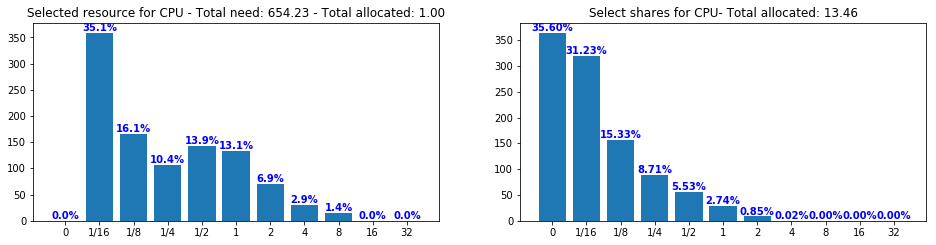

Reading parameter: 16 instead of None
Mean utilization: 0.323319 - Max utilization: 1.0039
Reserved Mean utilization: 0.280555 - Max utilization: 0.53942


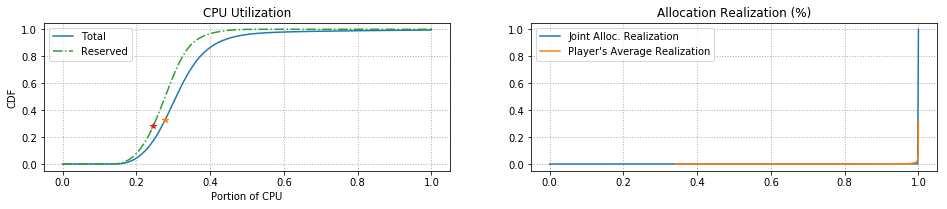

Reading parameter: 16 instead of None


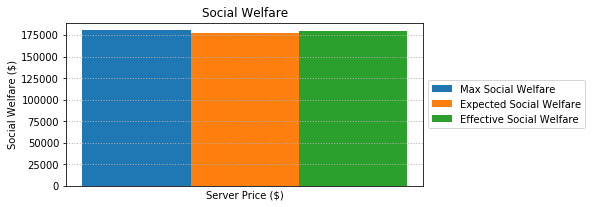

Reading parameter: 16 instead of None
Reading parameter: 16 instead of None
Reading parameter: 16 instead of None


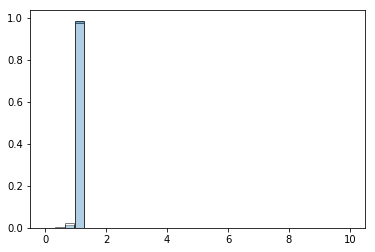

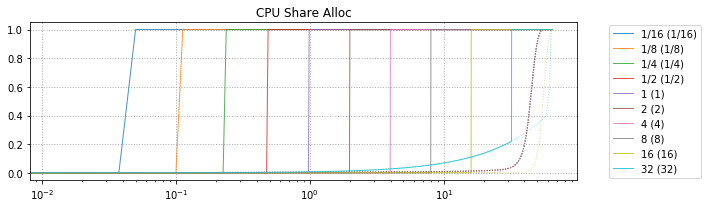

In [3]:
am.plot.plot_mean_unified_results(ds_obj.q, 'burst', None, 'burst-via-shares-2', compare_with_reserved=True)

Reading parameter: 60 instead of None
| Key                        |       Value |   Reserved Value |    Factor |
|:---------------------------|------------:|-----------------:|----------:|
| active-player-count        | 1024        |      1024        |  1        |
| allocated-count            |   69.983    |        24.9822   |  2.80132  |
| active-servers             |   15.4167   |        41.5833   |  0.370741 |
| always-active-servers      |   14        |        40        |  0.35     |
| host-revenue               | 1709.11     |      2636.42     |  0.648271 |
| resources-allocated-0      |    0.999999 |         0.999968 |  1.00003  |
| resources-allocated-1      |   17.2882   |         1        | 17.2882   |
| effective-value-mean-ratio |    1.36068  |         0.966494 |  1.40785  |
Reading parameter: 60 instead of None


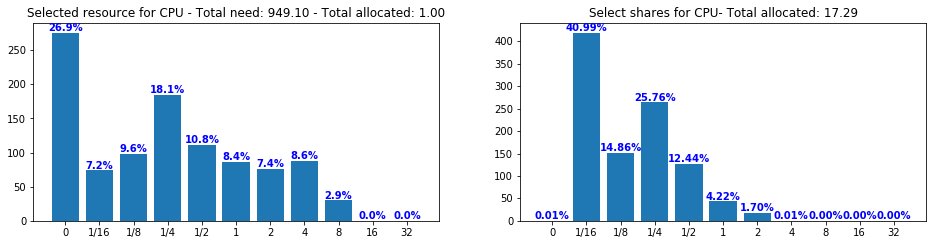

Reading parameter: 60 instead of None
Utilization:  0.8652126560755776
Reserved Utilization:  0.1459350938285953


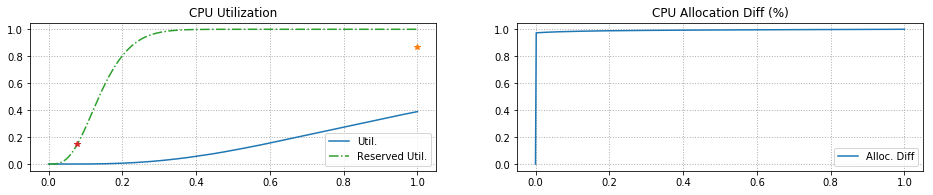

Reading parameter: 60 instead of None


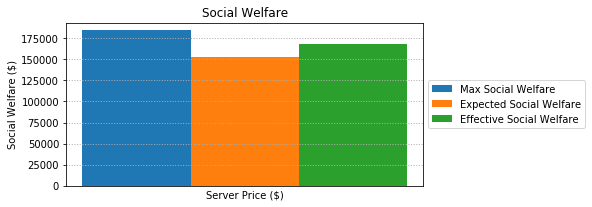

Reading parameter: 60 instead of None
Reading parameter: 60 instead of None
Reading parameter: 60 instead of None


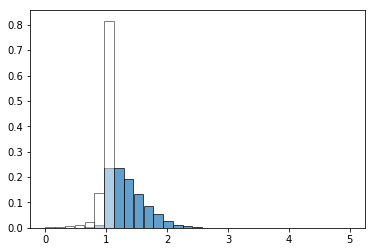

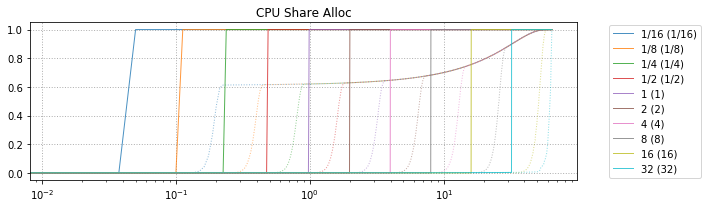

In [4]:
am.plot.plot_mean_unified_results(ds_obj.q, 'shares', None, 'shares-unlimit-3', compare_with_reserved=True)

In [3]:
am.plot.plot_mean_unified_results(ds_obj.q, 'shares', None, 'shares-limit-0.5', compare_with_reserved=True)

NameError: name 'am' is not defined

Reading parameter: 60 instead of None
| Key                        |       Value |   Reserved Value |     Factor |
|:---------------------------|------------:|-----------------:|-----------:|
| active-player-count        | 1024        |      1024        |   1        |
| allocated-count            |   96.0683   |        25.0442   |   3.83595  |
| active-servers             |   11.5      |        41.5833   |   0.276553 |
| always-active-servers      |   10        |        40        |   0.25     |
| host-revenue               | 2059.65     |      2636.42     |   0.781229 |
| resources-allocated-0      |    0.999999 |         0.999969 |   1.00003  |
| resources-allocated-1      |  507.333    |         1        | 507.333    |
| effective-value-mean-ratio |    1.12113  |         0.966494 |   1.16     |
Reading parameter: 60 instead of None


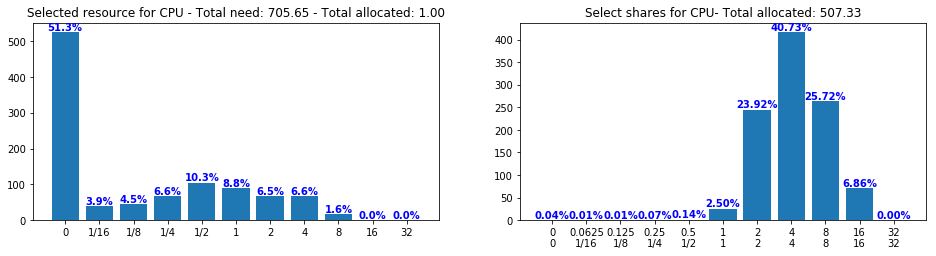

Reading parameter: 60 instead of None
Utilization:  0.8066676810931271
Reserved Utilization:  0.14813417674107013


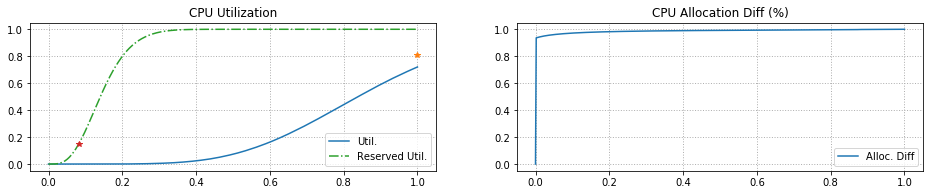

Reading parameter: 60 instead of None


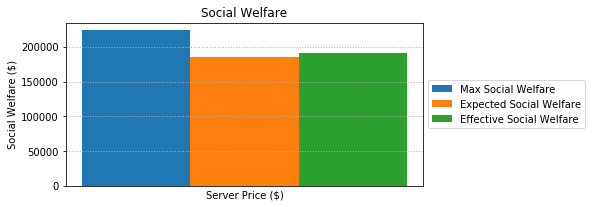

Reading parameter: 60 instead of None
Reading parameter: 60 instead of None
Reading parameter: 60 instead of None


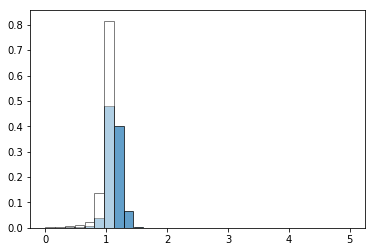

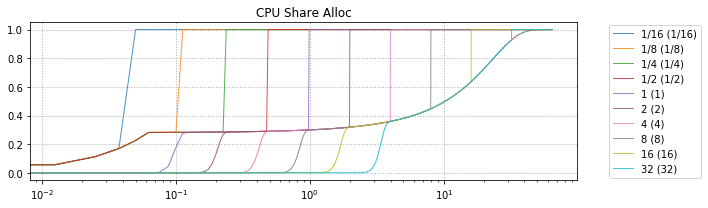

In [5]:
am.plot.plot_mean_unified_results(ds_obj.q, 'shares', None, 'shares-limit-0.25', compare_with_reserved=True)

Reading parameter: 36 instead of None
| Key                   |    Value |   Reserved Value |     Factor |
|:----------------------|---------:|-----------------:|-----------:|
| active-player-count   | 1024     |        1024      |   1        |
| allocated-count       |  251.489 |          82.8604 |   3.03509  |
| active-servers        |    4.75  |          13.0833 |   0.363057 |
| always-active-servers |    4     |          12      |   0.333333 |
| host-revenue          |  659.374 |         809.62   |   0.814424 |
| resources-allocated-0 |    1     |           1      |   1        |
| resources-allocated-1 |  137.913 |           1      | 137.913    |
Reading parameter: 36 instead of None


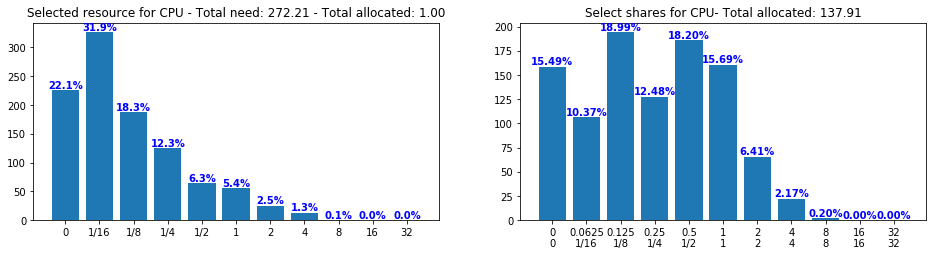

Reading parameter: 35 instead of None
Mean utilization: 0.769842 - Max utilization: 1.0039
Reserved Mean utilization: 0.438019 - Max utilization: 0.678195


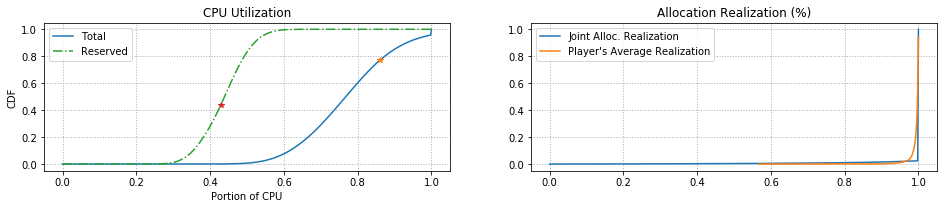

Reading parameter: 35 instead of None


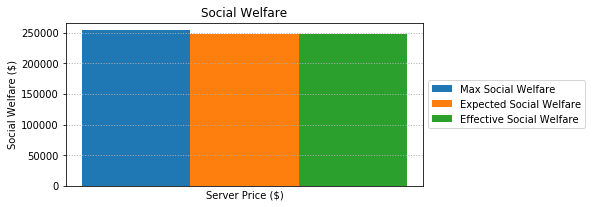

Reading parameter: 35 instead of None
Reading parameter: 35 instead of None
Reading parameter: 35 instead of None


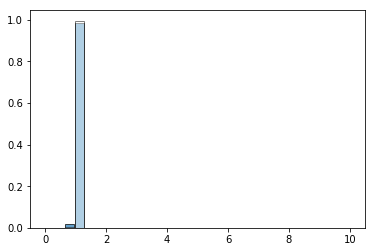

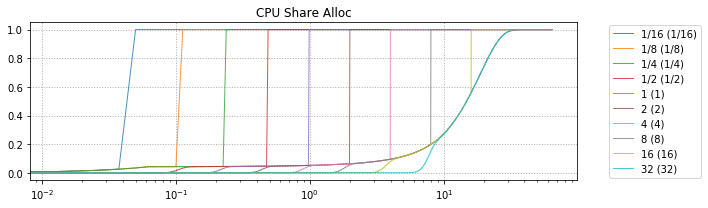

In [11]:
am.plot.plot_mean_unified_results(ds_obj.q, 'shares', None, 'shares-limit-0.7', compare_with_reserved=True)

Mean allocated players: 163.201 (X3.941)
Mean servers count: 6.833 (X0.269)
Mean always active servers count: 6.000
Mean host revenue: 784.797 (X0.494)


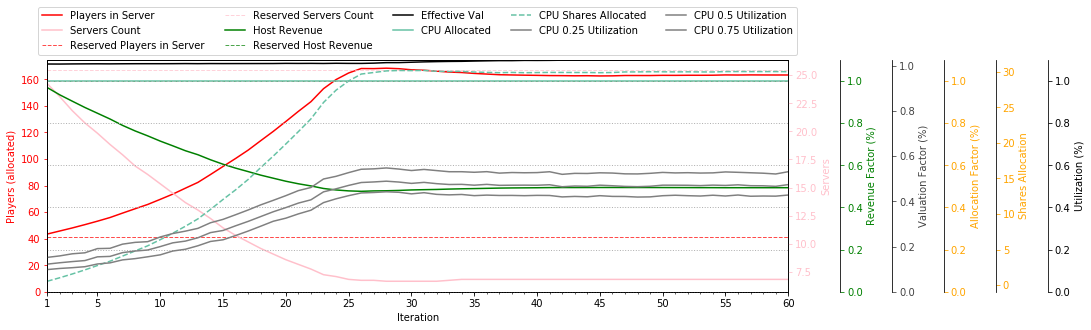

In [3]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'burst', 'burst-via-shares-2',
                                      clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 129.669 (X3.131)
Mean servers count: 8.500 (X0.334)
Mean always active servers count: 7.000
Mean host revenue: 912.490 (X0.574)


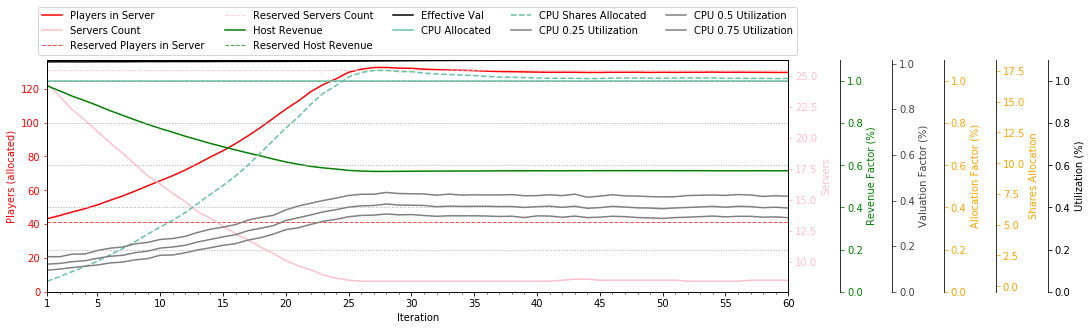

In [4]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'burst', 'burst-via-shares-3',
                                      clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 110.641 (X2.628)
Mean servers count: 9.917 (X0.397)
Mean always active servers count: 9.000
Mean host revenue: 988.823 (X0.633)


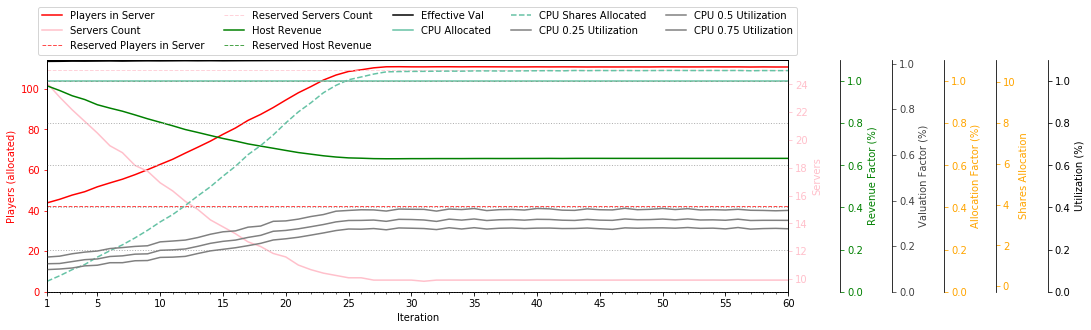

In [6]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'burst', 'burst-via-shares-4',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 69.345 (X2.786)
Mean servers count: 15.167 (X0.365)
Mean always active servers count: 14.000
Mean host revenue: 2220.672 (X0.842)


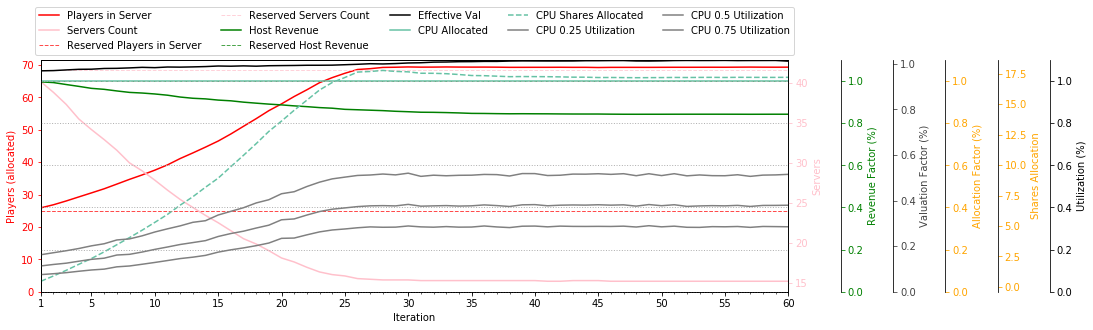

In [5]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'burst', 'burst-via-shares-5',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 227.292 (X5.398)
Mean servers count: 5.250 (X0.210)
Mean always active servers count: 5.000
Mean host revenue: 602.187 (X0.385)


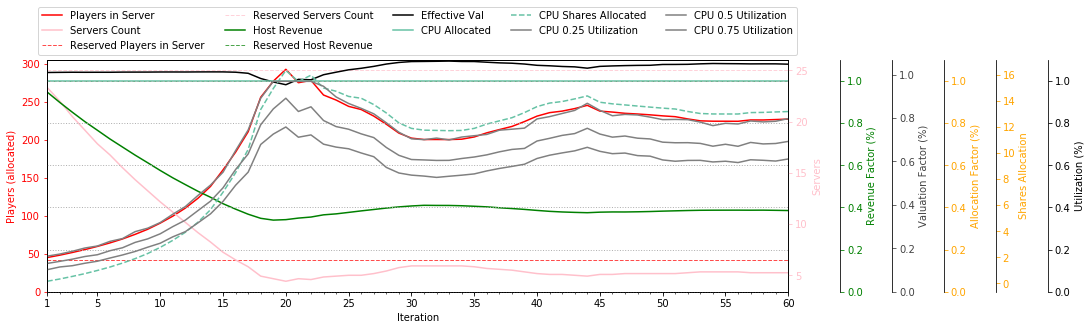

In [7]:
ds_obj_q.clear_cache()
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-unlimit-5',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 208.886 (X4.961)
Mean servers count: 5.667 (X0.227)
Mean always active servers count: 5.000
Mean host revenue: 682.677 (X0.437)


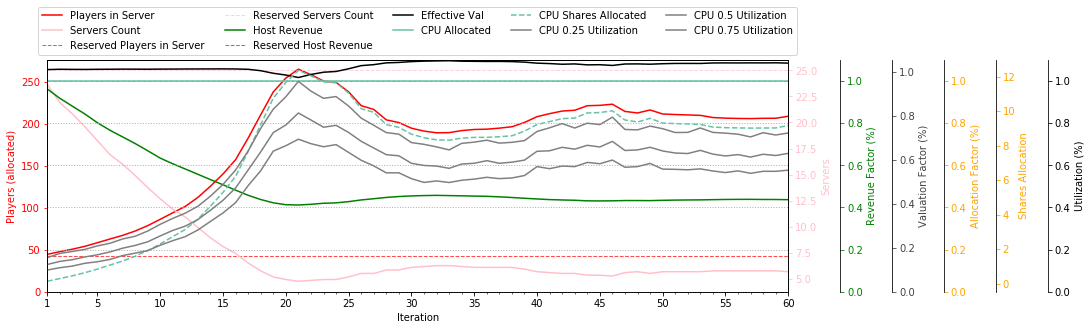

In [8]:
ds_obj_q.clear_cache()
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-unlimit-8',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 201.939 (X4.796)
Mean servers count: 5.833 (X0.233)
Mean always active servers count: 5.000
Mean host revenue: 709.458 (X0.454)


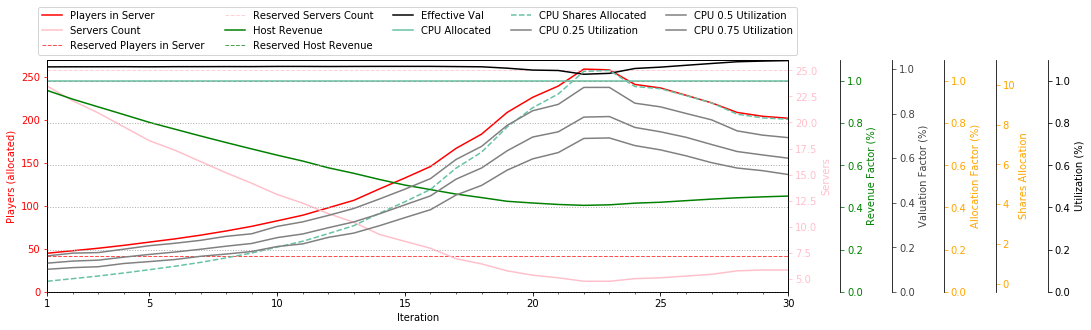

In [9]:
ds_obj_q.clear_cache()
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-unlimit-9',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 200.374 (X4.759)
Mean servers count: 5.917 (X0.237)
Mean always active servers count: 5.000
Mean host revenue: 1251.242 (X0.801)


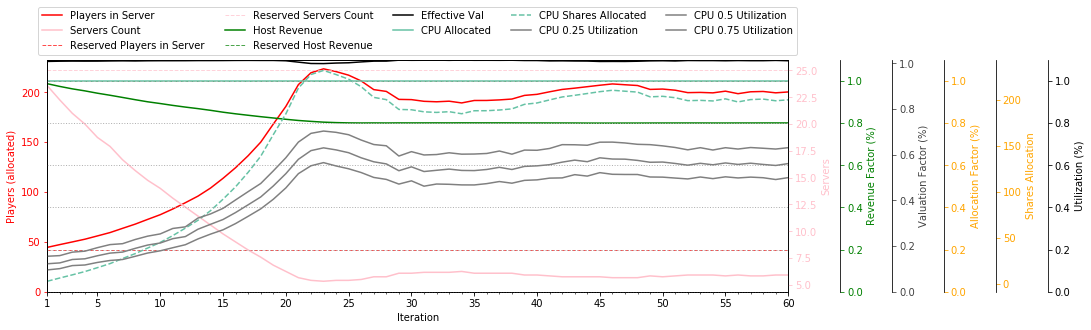

In [10]:
ds_obj_q.clear_cache()
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.9',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 131.675 (X5.289)
Mean servers count: 8.500 (X0.204)
Mean always active servers count: 7.000
Mean host revenue: 2284.666 (X0.867)


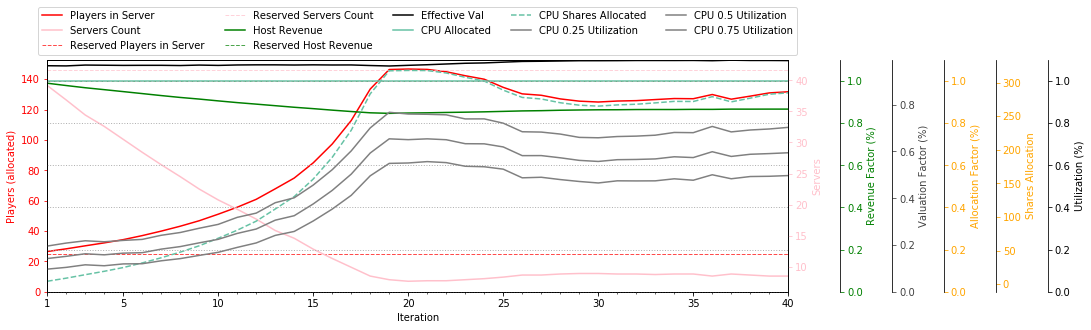

In [19]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.8',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 249.010 (X3.055)
Mean servers count: 4.750 (X0.363)
Mean always active servers count: 4.000
Mean host revenue: 660.674 (X0.816)


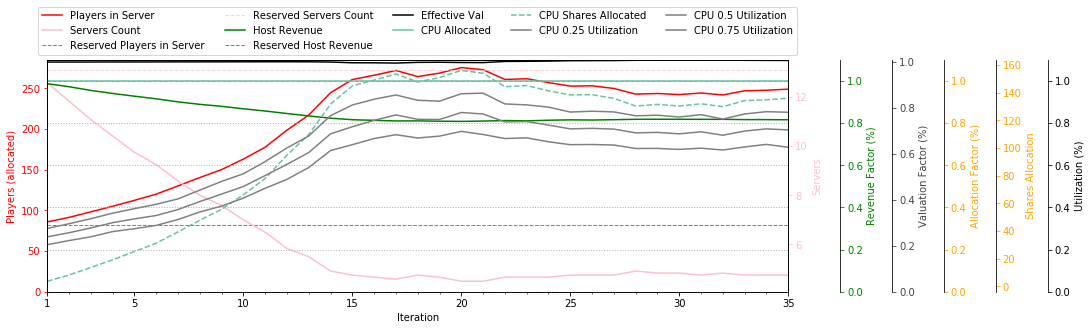

In [8]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.7',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 219.503 (X5.246)
Mean servers count: 5.333 (X0.213)
Mean always active servers count: 5.000
Mean host revenue: 986.126 (X0.627)


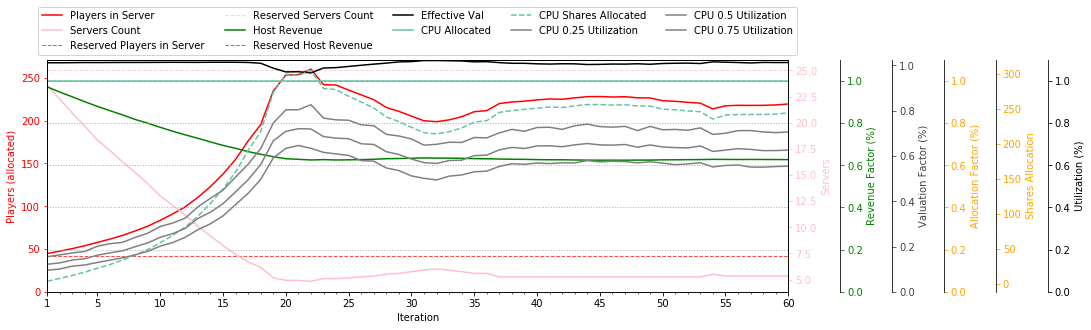

In [3]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.6',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 228.074 (X5.722)
Mean servers count: 5.217 (X0.199)
Mean always active servers count: 5.000
Mean host revenue: 965.130 (X0.585)


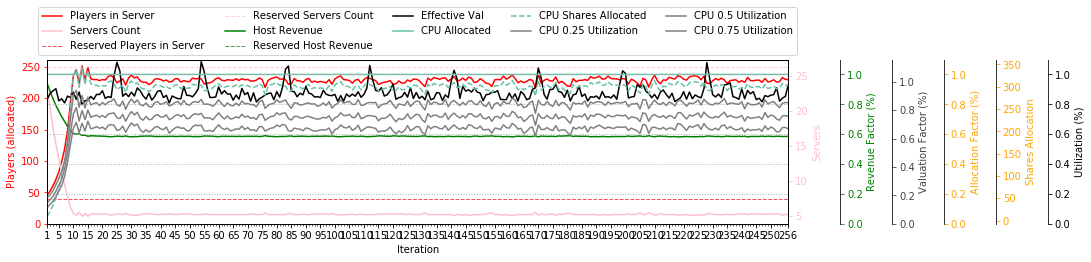

In [6]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=20)

Mean allocated players: 227.400 (X5.401)
Mean servers count: 5.183 (X0.207)
Mean always active servers count: 5.000
Mean host revenue: 910.226 (X0.583)


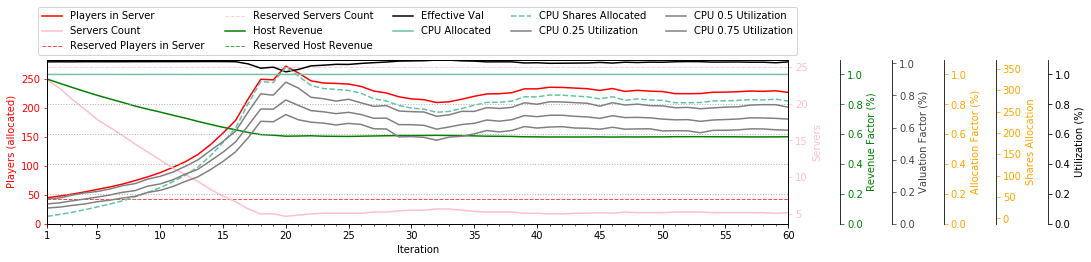

In [4]:
results.plot.plot_shares_iter_summary(data.real_increasing_1d.q, 'shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 159.237 (X3.995)
Mean servers count: 6.917 (X0.263)
Mean always active servers count: 6.000
Mean host revenue: 816.764 (X0.495)


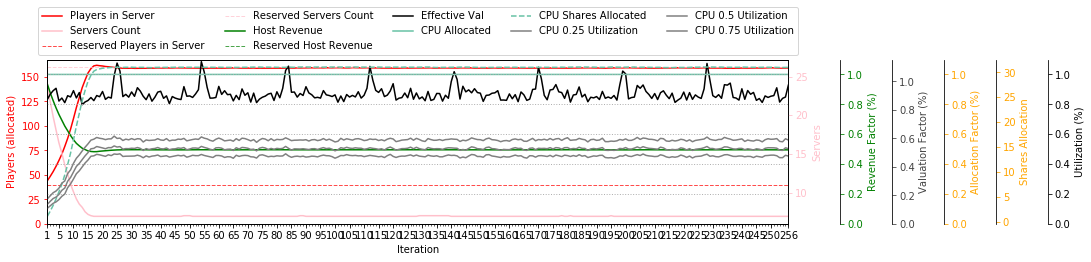

In [3]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'burst-via-shares-2',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 222.151 (X5.573)
Mean servers count: 5.147 (X0.196)
Mean always active servers count: 5.000
Mean host revenue: 757.302 (X0.459)


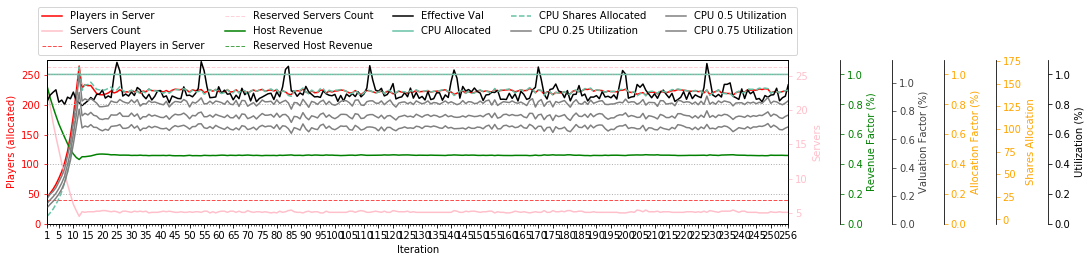

In [7]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares-limit-and-burst-0.5-2',
                                      clean_output=False, mean_over_last_iterations=60)

Mean allocated players: 160.811 (X3.944)
Mean servers count: 7.000 (X0.273)
Mean always active servers count: 6.000
Mean host revenue: 721.141 (X0.447)


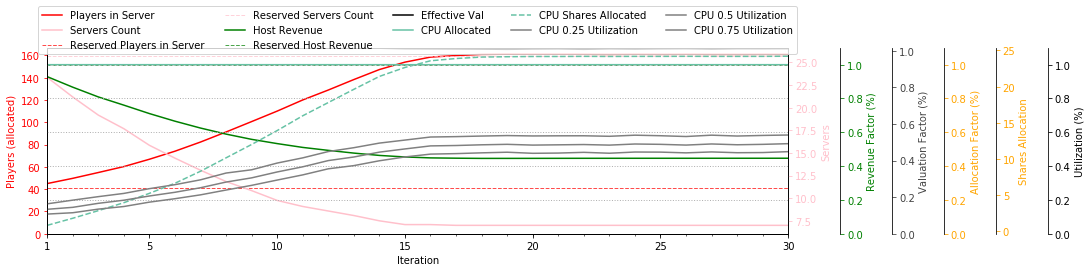

In [4]:
results.plot.plot_shares_iter_summary(data.real_nooverthetop_1d.q, 'burst', 'burst-via-shares-2',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 228.682 (X5.431)
Mean servers count: 5.120 (X0.205)
Mean always active servers count: 5.000
Mean host revenue: 909.166 (X0.582)


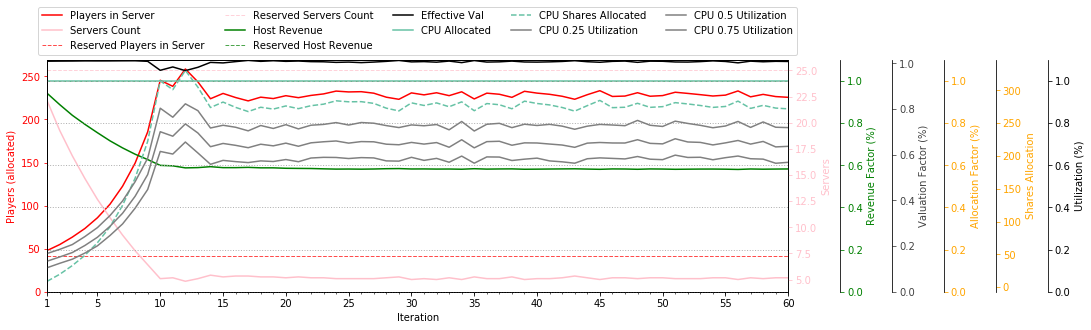

In [3]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'change-128-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=16)

Mean allocated players: 226.734 (X5.385)
Mean servers count: 5.156 (X0.206)
Mean always active servers count: 5.000
Mean host revenue: 911.600 (X0.583)


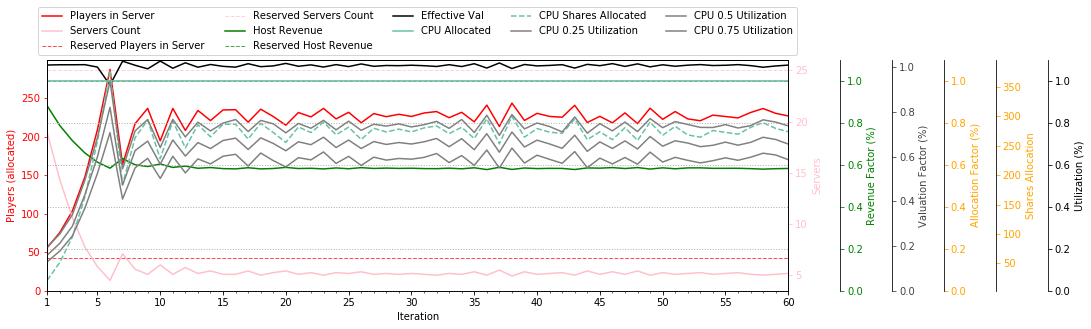

In [4]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'change-256-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=16)

Mean allocated players: 195.994 (X4.655)
Mean servers count: 7.875 (X0.315)
Mean always active servers count: 7.062
Mean host revenue: 1016.862 (X0.651)


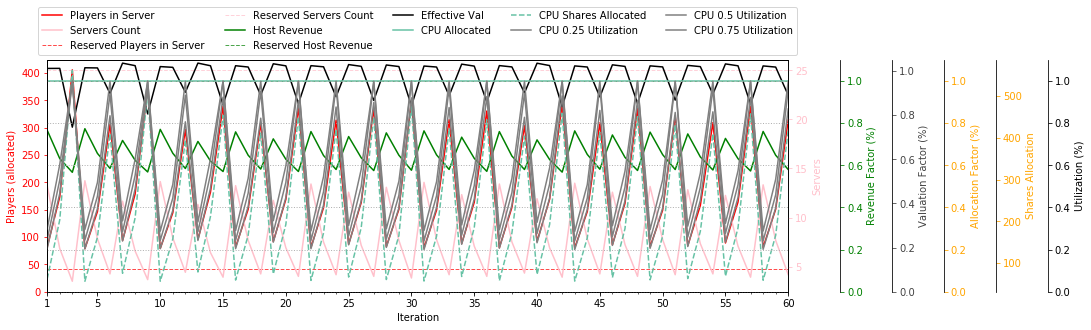

In [3]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'change-512-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=16)

Mean allocated players: 227.752 (X5.409)
Mean servers count: 5.133 (X0.205)
Mean always active servers count: 5.000
Mean host revenue: 910.716 (X0.583)


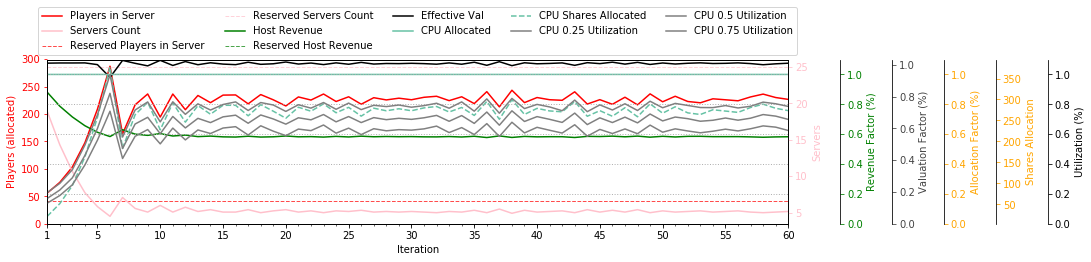

In [2]:
results.plot.plot_shares_iter_summary(data.real_increasing_1d.q, 'change-256-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 225.857 (X5.364)
Mean servers count: 5.350 (X0.214)
Mean always active servers count: 4.900
Mean host revenue: 917.922 (X0.588)


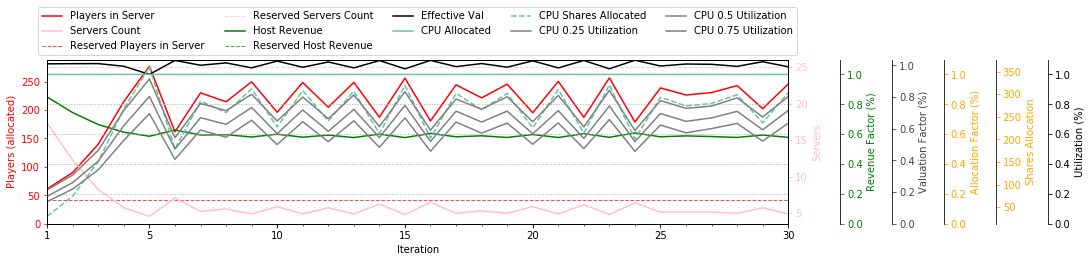

In [3]:
results.plot.plot_shares_iter_summary(data.real_increasing_1d.q, 'change-320-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 222.690 (X5.289)
Mean servers count: 5.508 (X0.220)
Mean always active servers count: 5.200
Mean host revenue: 923.773 (X0.591)


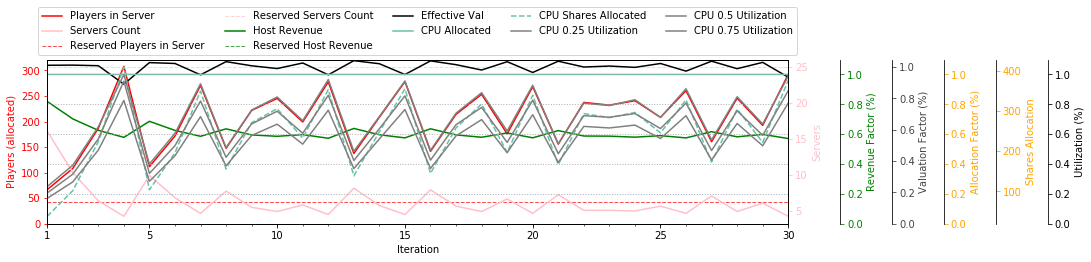

In [4]:
results.plot.plot_shares_iter_summary(data.real_increasing_1d.q, 'change-384-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 191.494 (X4.548)
Mean servers count: 7.242 (X0.290)
Mean always active servers count: 6.900
Mean host revenue: 988.453 (X0.633)


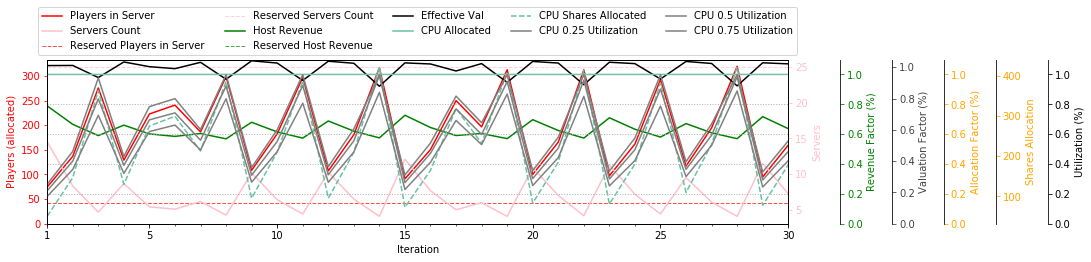

In [5]:
results.plot.plot_shares_iter_summary(data.real_increasing_1d.q, 'change-448-shares-limit-0.5',
                                      clean_output=False, mean_over_last_iterations=10)

Mean allocated players: 100.707 (X4.045)
Mean servers count: 11.083 (X0.267)
Mean always active servers count: 10.000
Mean host revenue: 2070.975 (X0.786)


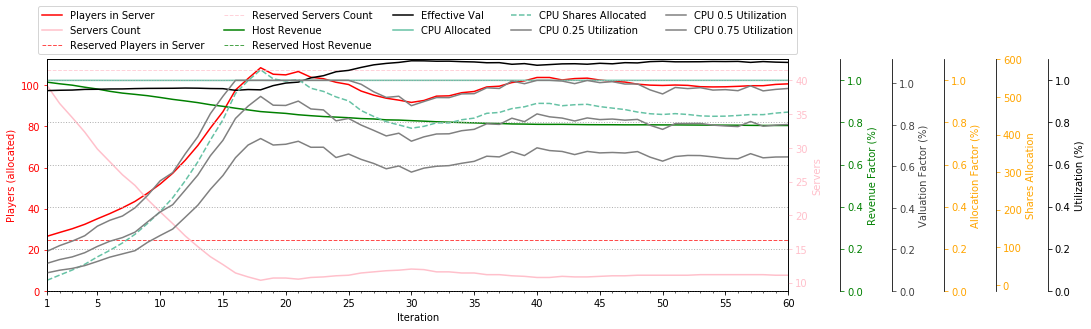

In [6]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.3',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 94.888 (X3.812)
Mean servers count: 11.667 (X0.281)
Mean always active servers count: 11.000
Mean host revenue: 2061.233 (X0.782)


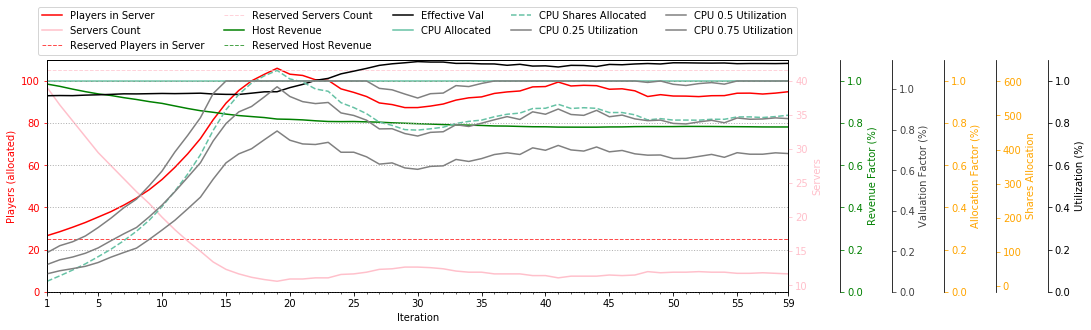

In [101]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.25',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 89.305 (X3.587)
Mean servers count: 12.250 (X0.295)
Mean always active servers count: 11.000
Mean host revenue: 2039.453 (X0.774)


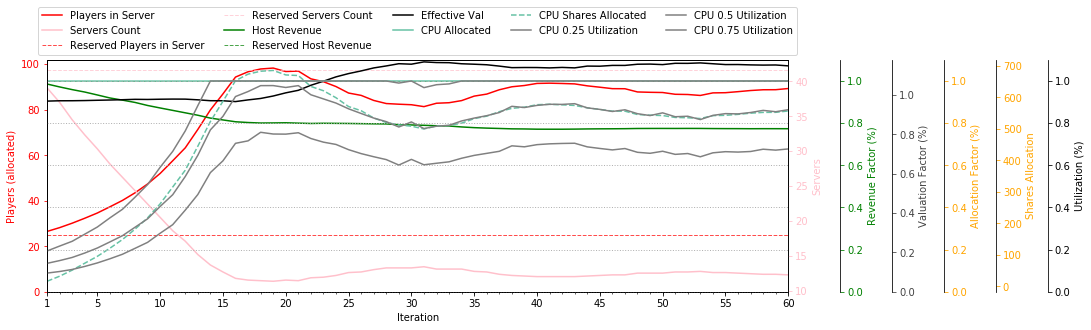

In [5]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.2',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 228.813 (X5.469)
Mean servers count: 5.250 (X0.210)
Mean always active servers count: 5.000
Mean host revenue: 598.052 (X0.380)


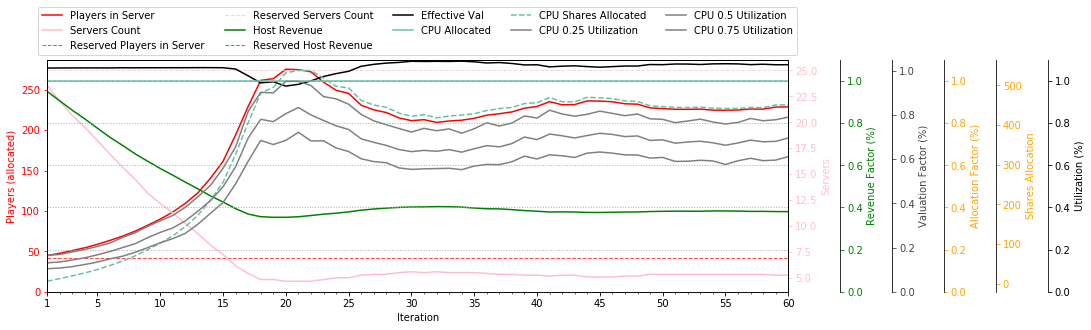

In [5]:
results.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.15',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 76.901 (X3.089)
Mean servers count: 14.167 (X0.341)
Mean always active servers count: 13.000
Mean host revenue: 1930.547 (X0.732)


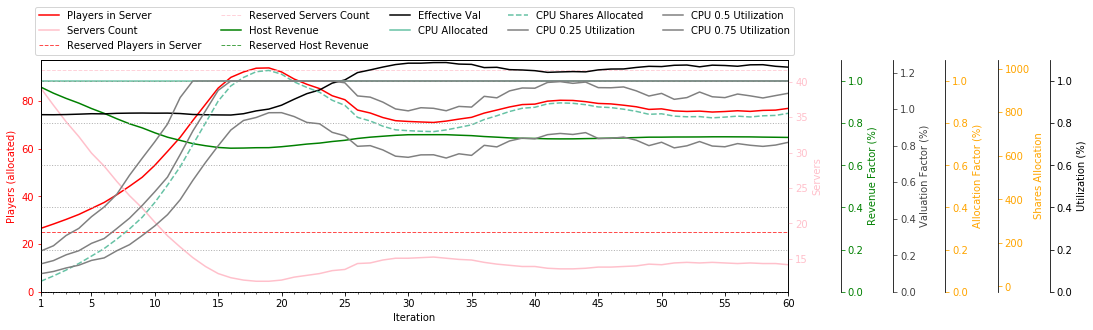

In [4]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-limit-0.1',
                                 clean_output=False, mean_over_last_iterations=1)

Mean allocated players: 70.196 (X2.820)
Mean servers count: 15.333 (X0.369)
Mean always active servers count: 14.000
Mean host revenue: 1696.708 (X0.644)


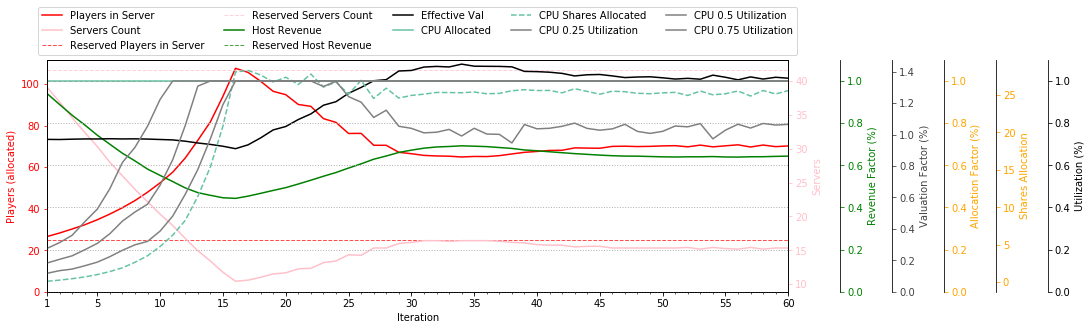

In [5]:
am.plot.plot_shares_iter_summary(ds_obj.q, 'shares', 'shares-unlimit-2',
                                 clean_output=False, mean_over_last_iterations=1)